In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nikhilreddya","key":"3dd7afdb35befd8ba7893b335f1c4840"}'}

In [2]:
!mkdir ~/.kaggle/

In [3]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c dogs-vs-cats

 97% 786M/812M [00:03<00:00, 238MB/s]
100% 812M/812M [00:03<00:00, 247MB/s]


In [5]:
!unzip -qq dogs-vs-cats.zip

In [6]:
!unzip -qq train.zip

#1. Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500.

Copying images to training,validation and test set.

In [7]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)

Using convulational neural network.

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [9]:

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [10]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

It can be observed that,model might overfit,thus,we use regularization technique in the stage of DATA PREPROCESSING.

Here,all the images are converted to tensors.

In [11]:

from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


callback can be used to save the model's weights after every epoch or to stop training early if the model is not improving. Additionally, callbacks can be used to log metrics, visualize the model's performance, or schedule learning rate changes.

In [12]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch1.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
63/63 [==============================] - 19s 80ms/step - loss: 0.6968 - accuracy: 0.5160 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 5s 79ms/step - loss: 0.6917 - accuracy: 0.5195 - val_loss: 0.6789 - val_accuracy: 0.5730
Epoch 3/10
63/63 [==============================] - 4s 64ms/step - loss: 0.6827 - accuracy: 0.5640 - val_loss: 0.7179 - val_accuracy: 0.5150
Epoch 4/10
63/63 [==============================] - 5s 75ms/step - loss: 0.6625 - accuracy: 0.6200 - val_loss: 0.6821 - val_accuracy: 0.5860
Epoch 5/10
63/63 [==============================] - 6s 91ms/step - loss: 0.6317 - accuracy: 0.6485 - val_loss: 0.6057 - val_accuracy: 0.6810
Epoch 6/10
63/63 [==============================] - 4s 61ms/step - loss: 0.6025 - accuracy: 0.6800 - val_loss: 0.6325 - val_accuracy: 0.6220
Epoch 7/10
63/63 [==============================] - 6s 87ms/step - loss: 0.5746 - accuracy: 0.6960 - val_loss: 0.5784 - val_accuracy: 0.6870
Epoch 8/10
6

it can be observed that accuracy is increasing with number of epochs.


Accuracy=77.4%
Val_acc=71.2%
test_acc=76.1%

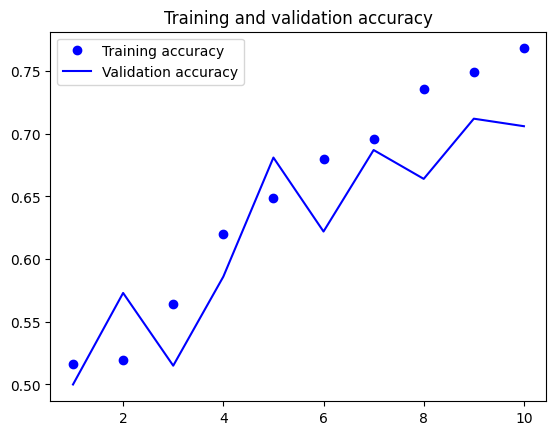

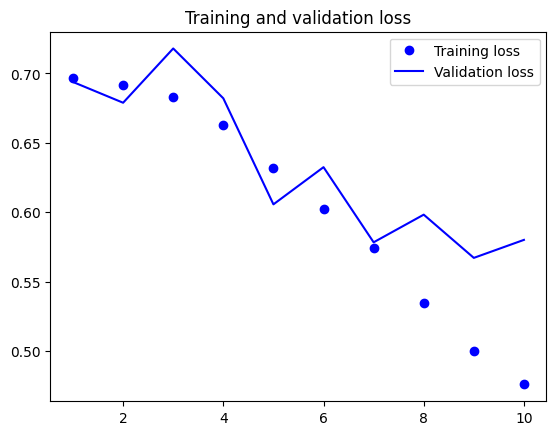

In [14]:

import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [15]:

test_model = keras.models.load_model("convnet_from_scratch1.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 31ms/step - loss: 0.5800 - accuracy: 0.7040
Test accuracy: 0.704


test accuracy with no data augmentation=76.1%

#Data Augmentation

Data augmentation is a technique used to increase the size of a training set by creating new, modified versions of the original data. This helps to reduce overfitting and improve the generalization ability of the model. 

In [17]:

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [18]:

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [19]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation1.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
63/63 [==============================] - 7s 71ms/step - loss: 0.7074 - accuracy: 0.4970 - val_loss: 0.6928 - val_accuracy: 0.5620
Epoch 2/10
63/63 [==============================] - 4s 66ms/step - loss: 0.6973 - accuracy: 0.5080 - val_loss: 0.6913 - val_accuracy: 0.5250
Epoch 3/10
63/63 [==============================] - 5s 74ms/step - loss: 0.6946 - accuracy: 0.5130 - val_loss: 0.6885 - val_accuracy: 0.6200
Epoch 4/10
63/63 [==============================] - 5s 73ms/step - loss: 0.6919 - accuracy: 0.5505 - val_loss: 0.6844 - val_accuracy: 0.5450
Epoch 5/10
63/63 [==============================] - 4s 66ms/step - loss: 0.6695 - accuracy: 0.6055 - val_loss: 0.6587 - val_accuracy: 0.6120
Epoch 6/10
63/63 [==============================] - 5s 80ms/step - loss: 0.6592 - accuracy: 0.6145 - val_loss: 0.6497 - val_accuracy: 0.6230
Epoch 7/10
63/63 [==============================] - 4s 65ms/step - loss: 0.6381 - accuracy: 0.6370 - val_loss: 0.8441 - val_accuracy: 0.5240
Epoch 8/10
63

data augmentation to the model did not bring any better results,but yet can be checked by increasing the training sample size and trying on data augmentation on it.

accuracy=73.2%
val_acc=73%
test_acc=72.5%

In [20]:

test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation1.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 32ms/step - loss: 0.6436 - accuracy: 0.6220
Test accuracy: 0.622


test accuracy was not improved

#2)Increase training sample size.

Attempted to increase training sample size from 1000 to 1500.

In [21]:

import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1500, end_index=2000)
make_subset("test", start_index=2000, end_index=2500)

In [22]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 3000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [23]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [24]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
94/94 [==============================] - 9s 78ms/step - loss: 0.6972 - accuracy: 0.5027 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/10
94/94 [==============================] - 6s 58ms/step - loss: 0.6897 - accuracy: 0.5490 - val_loss: 0.6762 - val_accuracy: 0.5110
Epoch 3/10
94/94 [==============================] - 6s 57ms/step - loss: 0.6372 - accuracy: 0.6330 - val_loss: 0.6521 - val_accuracy: 0.5950
Epoch 4/10
94/94 [==============================] - 7s 69ms/step - loss: 0.5899 - accuracy: 0.6807 - val_loss: 0.5912 - val_accuracy: 0.6720
Epoch 5/10
94/94 [==============================] - 7s 68ms/step - loss: 0.5626 - accuracy: 0.7043 - val_loss: 0.5815 - val_accuracy: 0.6830
Epoch 6/10
94/94 [==============================] - 6s 56ms/step - loss: 0.5216 - accuracy: 0.7420 - val_loss: 0.5892 - val_accuracy: 0.6850
Epoch 7/10
94/94 [==============================] - 7s 68ms/step - loss: 0.4990 - accuracy: 0.7527 - val_loss: 0.5364 - val_accuracy: 0.7390
Epoch 8/10
94

In [25]:
test_model = keras.models.load_model(
    "convnet_from_scratch2.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 31ms/step - loss: 0.5084 - accuracy: 0.7500
Test accuracy: 0.750


Accuracy=84.5%
val_acc=73.6%
test_acc=75.7%

##using data augmentation

In [26]:

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [27]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [28]:

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
94/94 [==============================] - 10s 61ms/step - loss: 0.6958 - accuracy: 0.5117 - val_loss: 0.6911 - val_accuracy: 0.5060
Epoch 2/10
94/94 [==============================] - 7s 69ms/step - loss: 0.6899 - accuracy: 0.5463 - val_loss: 0.6783 - val_accuracy: 0.5480
Epoch 3/10
94/94 [==============================] - 7s 70ms/step - loss: 0.6731 - accuracy: 0.5900 - val_loss: 0.6809 - val_accuracy: 0.5960
Epoch 4/10
94/94 [==============================] - 6s 62ms/step - loss: 0.6560 - accuracy: 0.6253 - val_loss: 0.6691 - val_accuracy: 0.6110
Epoch 5/10
94/94 [==============================] - 6s 60ms/step - loss: 0.6462 - accuracy: 0.6430 - val_loss: 0.6443 - val_accuracy: 0.6250
Epoch 6/10
94/94 [==============================] - 10s 105ms/step - loss: 0.6236 - accuracy: 0.6597 - val_loss: 0.6429 - val_accuracy: 0.6400
Epoch 7/10
94/94 [==============================] - 6s 59ms/step - loss: 0.6147 - accuracy: 0.6730 - val_loss: 0.6150 - val_accuracy: 0.6580
Epoch 8/10

In [29]:

test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation2.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 32ms/step - loss: 0.5807 - accuracy: 0.7030
Test accuracy: 0.703


accuracy=73.1%
val_acc=70.9%
test_acc=71.4%

#3. Finding the ideal training sample size

We set the training, validation, and test set sizes, respectively, to 1500, 1000, and 500.

In [30]:

import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1500, end_index=2500)
make_subset("test", start_index=2500, end_index=3000)

In [31]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 3000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [32]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
     

In [33]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
94/94 [==============================] - 9s 80ms/step - loss: 0.7064 - accuracy: 0.5210 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 2/10
94/94 [==============================] - 7s 67ms/step - loss: 0.6905 - accuracy: 0.5567 - val_loss: 0.6685 - val_accuracy: 0.6550
Epoch 3/10
94/94 [==============================] - 7s 67ms/step - loss: 0.6575 - accuracy: 0.6267 - val_loss: 0.6635 - val_accuracy: 0.5995
Epoch 4/10
94/94 [==============================] - 8s 82ms/step - loss: 0.6115 - accuracy: 0.6697 - val_loss: 0.6214 - val_accuracy: 0.6470
Epoch 5/10
94/94 [==============================] - 7s 69ms/step - loss: 0.5740 - accuracy: 0.7030 - val_loss: 0.5951 - val_accuracy: 0.6750
Epoch 6/10
94/94 [==============================] - 7s 67ms/step - loss: 0.5392 - accuracy: 0.7260 - val_loss: 0.5547 - val_accuracy: 0.7265
Epoch 7/10
94/94 [==============================] - 6s 67ms/step - loss: 0.4992 - accuracy: 0.7510 - val_loss: 0.5758 - val_accuracy: 0.7375
Epoch 8/10
94

In [34]:

test_model = keras.models.load_model(
    "convnet_from_scratch3.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 31ms/step - loss: 0.5875 - accuracy: 0.7160
Test accuracy: 0.716


accuracy=85.6%
val_Acc=73.7%
test_Acc=72.6%

##Using Data augmentation

In [35]:

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [36]:

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [37]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
94/94 [==============================] - 11s 84ms/step - loss: 0.6937 - accuracy: 0.5227 - val_loss: 0.7510 - val_accuracy: 0.5350
Epoch 2/10
94/94 [==============================] - 7s 69ms/step - loss: 0.6744 - accuracy: 0.5903 - val_loss: 0.6722 - val_accuracy: 0.5760
Epoch 3/10
94/94 [==============================] - 7s 71ms/step - loss: 0.6614 - accuracy: 0.6023 - val_loss: 0.6813 - val_accuracy: 0.5480
Epoch 4/10
94/94 [==============================] - 8s 80ms/step - loss: 0.6546 - accuracy: 0.6167 - val_loss: 0.6367 - val_accuracy: 0.6500
Epoch 5/10
94/94 [==============================] - 10s 101ms/step - loss: 0.6135 - accuracy: 0.6640 - val_loss: 0.6668 - val_accuracy: 0.6325
Epoch 6/10
94/94 [==============================] - 7s 70ms/step - loss: 0.6086 - accuracy: 0.6637 - val_loss: 0.6639 - val_accuracy: 0.6615
Epoch 7/10
94/94 [==============================] - 8s 81ms/step - loss: 0.5812 - accuracy: 0.6960 - val_loss: 0.5683 - val_accuracy: 0.7120
Epoch 8/10

In [38]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation3.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")



32/32 [==============================] - 1s 30ms/step - loss: 0.5595 - accuracy: 0.7300
Test accuracy: 0.730


Accuracy=53.7%
val_acc=54.5%
test_acc=57.9%

#4.Using a pre-trained network

VGG16 is the architecture of this pre-trained network.

Feature extraction - Instantiating the VGG16 convolutional base

In [39]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))
conv_base.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                              

Feature extraction - Extracting features and corresponding labels

In [40]:

import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

train_features.shape

1/1 [==============================] - 1s 1s/step


(3000, 5, 5, 512)

Feature extraction - Defining and training the densely connected classifier

In [41]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extractionPT1.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=15,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/15
94/94 [==============================] - 2s 11ms/step - loss: 14.8701 - accuracy: 0.9333 - val_loss: 4.3387 - val_accuracy: 0.9700
Epoch 2/15
94/94 [==============================] - 1s 6ms/step - loss: 3.6801 - accuracy: 0.9787 - val_loss: 4.5941 - val_accuracy: 0.9700
Epoch 3/15
94/94 [==============================] - 1s 5ms/step - loss: 2.5119 - accuracy: 0.9863 - val_loss: 4.5689 - val_accuracy: 0.9730
Epoch 4/15
94/94 [==============================] - 1s 7ms/step - loss: 0.4453 - accuracy: 0.9967 - val_loss: 5.5699 - val_accuracy: 0.9715
Epoch 5/15
94/94 [==============================] - 1s 6ms/step - loss: 0.8458 - accuracy: 0.9923 - val_loss: 4.9298 - val_accuracy: 0.9745
Epoch 6/15
94/94 [==============================] - 1s 5ms/step - loss: 0.3528 - accuracy: 0.9960 - val_loss: 4.5621 - val_accuracy: 0.9725
Epoch 7/15
94/94 [==============================] - 0s 5ms/step - loss: 0.8286 - accuracy: 0.9940 - val_loss: 7.9507 - val_accuracy: 0.9685
Epoch 8/15
94/94 [

accuracy=99.8%
val_acc=97.3%

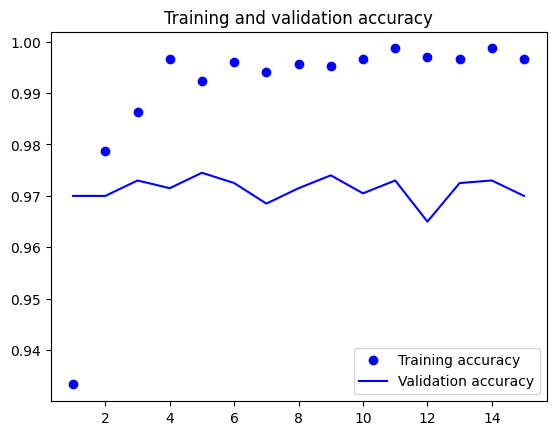

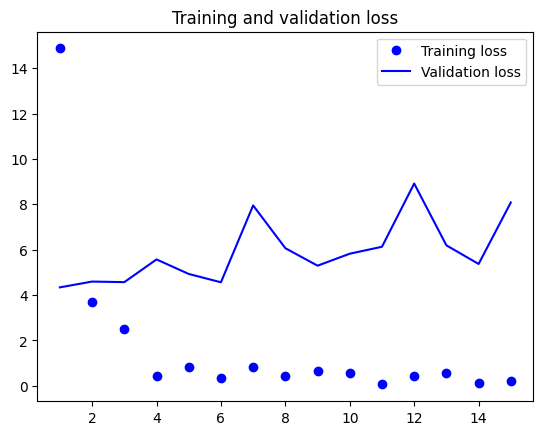

In [42]:

import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [43]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False
     

conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))
     

conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))
     

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


##Feature extraction with Data Augmentation

In [44]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [45]:

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentationPT2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/5
94/94 [==============================] - 16s 156ms/step - loss: 14.9756 - accuracy: 0.9160 - val_loss: 2.9392 - val_accuracy: 0.9695
Epoch 2/5
94/94 [==============================] - 15s 152ms/step - loss: 6.5792 - accuracy: 0.9460 - val_loss: 3.0317 - val_accuracy: 0.9775
Epoch 3/5
94/94 [==============================] - 15s 157ms/step - loss: 4.9990 - accuracy: 0.9577 - val_loss: 2.8450 - val_accuracy: 0.9760
Epoch 4/5
94/94 [==============================] - 15s 154ms/step - loss: 4.3803 - accuracy: 0.9637 - val_loss: 3.0952 - val_accuracy: 0.9745
Epoch 5/5
94/94 [==============================] - 15s 155ms/step - loss: 4.0996 - accuracy: 0.9587 - val_loss: 3.8588 - val_accuracy: 0.9725


In [46]:

test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentationPT2.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 89ms/step - loss: 4.2593 - accuracy: 0.9690
Test accuracy: 0.969


accuracy=96.9%
val_Acc=97.4%
test_acc=97.4%